In [1]:
# Pre Setup
%matplotlib inline

# Get Dataset 

In [2]:
# Get current dataset

import urllib.request
import pandas as pd
with urllib.request.urlopen('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv') as f:
    #html = f.read().decode('utf-8')
    df = pd.read_csv(f, encoding = 'utf-8', index_col = [1,0], header = 0)
    
# Save a cached version    
df.to_pickle("Current.pic")


# Read dataset

In [3]:
df = pd.read_pickle("Current.pic").sort_index()
df.tail()

Confirmed  Recovered  Deaths
Country  Date                                    
Zimbabwe 2020-06-29        574        152       7
         2020-06-30        591        162       7
         2020-07-01        605        166       7
         2020-07-02        617        173       7
         2020-07-03        625        176       7

# Compute metrics

In [13]:
df["NewConfirmed"] = df.groupby(level = 0)["Confirmed"].diff()
df["weeklyAverage"] = df.groupby(level = 0)["NewConfirmed"].rolling(7, center = True ).mean().values

# Plot what we want

In [23]:
countries = ['Germany','United Kingdom', 'US']
lastXdays = 130

/usr/lib/python3/dist-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


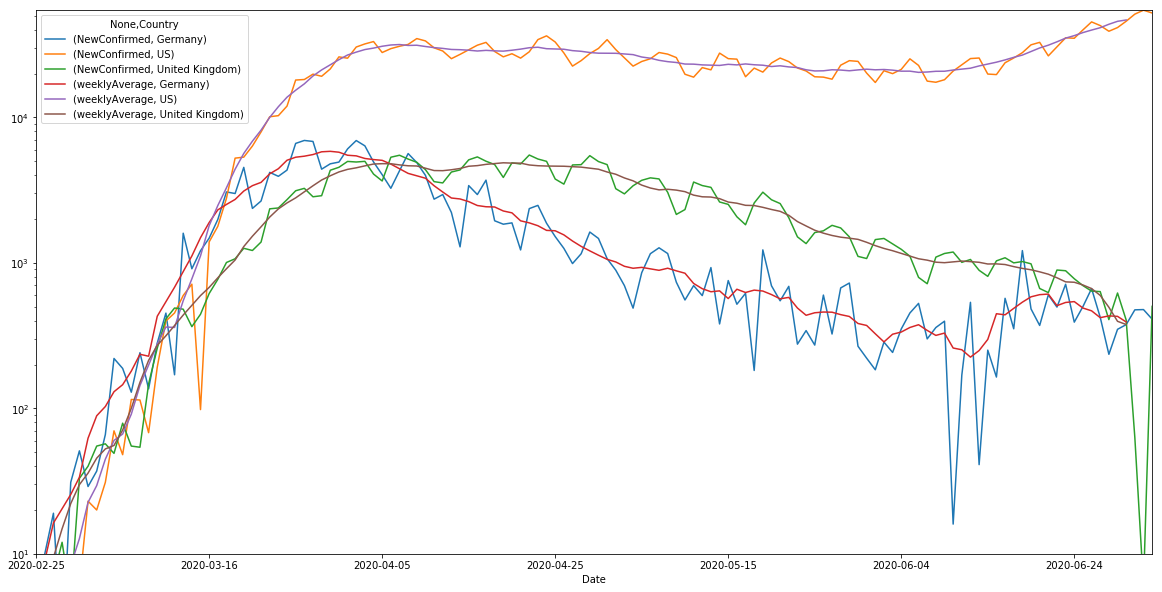

In [25]:
# Filter ...
to_plot = df.loc[df.index.get_level_values("Country").isin(countries),
       df.columns.get_level_values(0).isin(['NewConfirmed',"weeklyAverage"])
      ]
# .. and plot 
to_plot.unstack(level=0).dropna(how = 'all').iloc[-lastXdays:]\
.plot(figsize = (20,10), logy=True,ylim = (10,to_plot.max().max()));

In [43]:
[country for country in df.index.levels[0] if "US" in country ]

['US']